In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# 设置参数
A = -0.3          # 振幅/最大沉降量 (m)，负值表示沉降
x0 = 400          # 形变中心X坐标 (m)
y0 = 500          # 形变中心Y坐标 (m)
sigma_x = 200     # X方向标准差 
sigma_y = 150     # Y方向标准差 
grid_size = 1000  # 模拟区域大小 
resolution = 10   # 空间分辨率 (m)

In [6]:
# 生成坐标网格
x = np.arange(0, grid_size + resolution, resolution)
y = np.arange(0, grid_size + resolution, resolution)
X, Y = np.meshgrid(x, y)

# 二维高斯形变模型 (沉降漏斗)
deformation = A * np.exp(-((X - x0)**2 / (2 * sigma_x**2) + 
                           (Y - y0)**2 / (2 * sigma_y**2)))

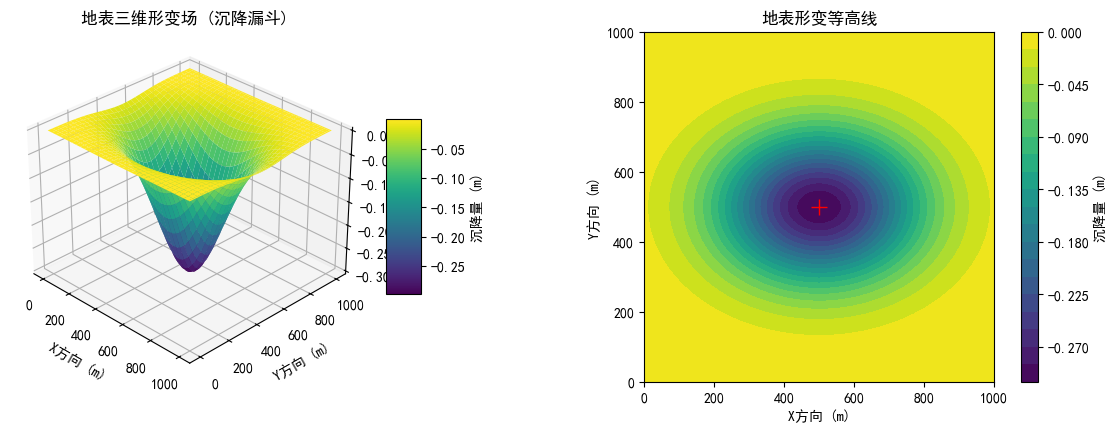

In [8]:
# 创建图形
plt.figure(figsize=(15, 10))
# 1. 三维表面图
ax1 = plt.subplot(2, 2, 1, projection='3d')
surf = ax1.plot_surface(X, Y, deformation, cmap='viridis', edgecolor='none')
ax1.set_title('地表三维形变场 (沉降漏斗)')
ax1.set_xlabel('X方向 (m)')
ax1.set_ylabel('Y方向 (m)')
ax1.set_zlabel('垂直形变量 (m)')
plt.colorbar(surf, ax=ax1, shrink=0.5, aspect=5, label='沉降量 (m)')
ax1.view_init(elev=30, azim=-45)  # 设置视角

# 2. 二维等高线图
ax2 = plt.subplot(2, 2, 2)
contour = ax2.contourf(X, Y, deformation, 20, cmap='viridis')
ax2.plot(x0, y0, 'r+', markersize=12, linewidth=2)  # 标记形变中心
ax2.set_title('地表形变等高线')
ax2.set_xlabel('X方向 (m)')
ax2.set_ylabel('Y方向 (m)')
ax2.set_aspect('equal')
plt.colorbar(contour, ax=ax2, label='沉降量 (m)')


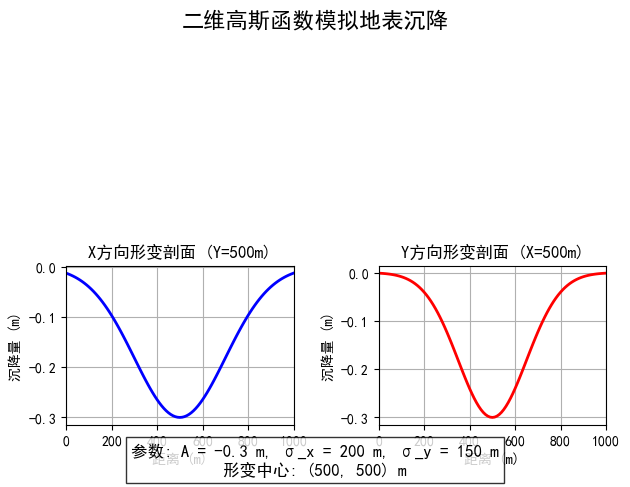

In [9]:
# 3. X方向形变剖面 (Y=y0)
ax3 = plt.subplot(2, 2, 3)
# 找到最接近y0的索引
y_idx = np.argmin(np.abs(y - y0))
profile_x = deformation[y_idx, :]
ax3.plot(x, profile_x, 'b', linewidth=2)
ax3.set_title(f'X方向形变剖面 (Y={y[y_idx]}m)')
ax3.set_xlabel('距离 (m)')
ax3.set_ylabel('沉降量 (m)')
ax3.grid(True)
ax3.set_xlim([0, grid_size])

# 4. Y方向形变剖面 (X=x0)
ax4 = plt.subplot(2, 2, 4)
# 找到最接近x0的索引
x_idx = np.argmin(np.abs(x - x0))
profile_y = deformation[:, x_idx]
ax4.plot(y, profile_y, 'r', linewidth=2)
ax4.set_title(f'Y方向形变剖面 (X={x[x_idx]}m)')
ax4.set_xlabel('距离 (m)')
ax4.set_ylabel('沉降量 (m)')
ax4.grid(True)
ax4.set_xlim([0, grid_size])

# 添加整体标题和参数信息
plt.suptitle('二维高斯函数模拟地表沉降', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # 为suptitle留出空间

# 添加参数信息框
param_text = f'参数: A = {A} m, σ_x = {sigma_x} m, σ_y = {sigma_y} m\n形变中心: ({x0}, {y0}) m'
plt.figtext(0.5, 0.01, param_text, ha='center', fontsize=12, 
            bbox=dict(facecolor='white', alpha=0.8))

plt.show()

# 保存数据 (可选)
# np.savez('deformation_field.npz', X=X, Y=Y, deformation=deformation)

In [10]:
N=2
m=n=128
D=np.diag(np.random.rand(N))  # 随机对角阵
U = np.linalg.qr(np.random.rand(N, N))[0]  # 随机正交矩阵
Sigma = U.T @ D @ U  # 互相关矩阵
Sigma = Sigma * ((m + n) * 2)  # 缩放协方差矩阵


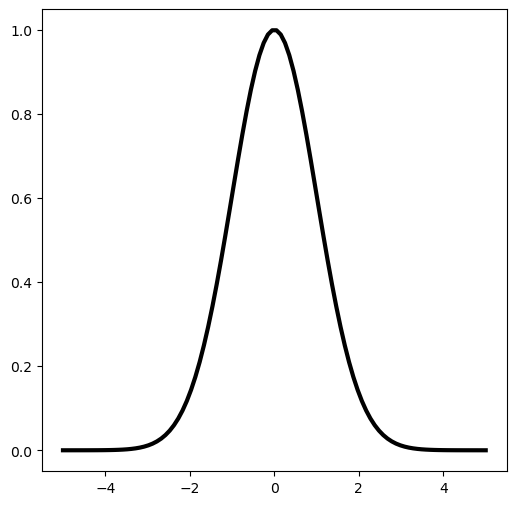

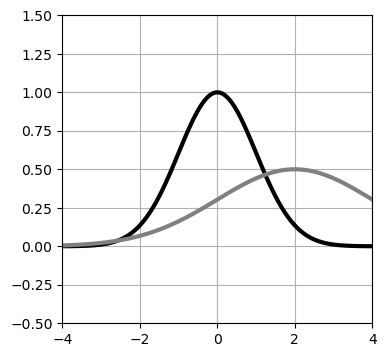

In [3]:
import numpy as np
import matplotlib.pyplot as plt
def gauss(mu, sigma, a):
    return a * np.exp(-(x - mu)**2 / (2 * sigma**2))

x=np.linspace(-5,5,100)
plt.figure(figsize=(6,6))
plt.plot(x, gauss(0, 1, 1), 'black', linewidth=3)

x = np.linspace(-4, 4, 100)
plt.figure(figsize=(4, 4))
plt.plot(x, gauss(0, 1, 1), 'black', linewidth=3)
plt.plot(x, gauss(2, 2, 0.5), 'gray', linewidth=3)

plt.ylim(-.5, 1.5)
plt.xlim(-4, 4)
plt.grid(True)
# plt.show()